In [3]:
# !pip install arch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 907.3/907.3 KB 14.2 MB/s eta 0:00:00


In [4]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import grangercausalitytests
from scipy.stats import pearsonr
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics.gofplots import qqplot
import statsmodels.api as sm
from arch import arch_model
import plotly.express as px
import plotly.figure_factory as ff
import statsmodels.api as sm
from scipy.stats import t
from scipy.optimize import fmin, minimize

from ipywidgets import HBox, VBox, Dropdown, Output
from scipy.optimize import fmin, minimize
from scipy.stats import t
from scipy.stats import norm
from math import inf
from IPython.display import display

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
plt.rcParams["figure.dpi"] = 360
%matplotlib inline

In [5]:
path = '/content/data.xlsx'
df = pd.read_excel(path)
df.isna().sum()

datetime        0
premium         0
pertalite       0
pertamax        0
beras           0
dagingAyam      0
dagingSapi      0
telurAyam       0
bawangMerah     0
bawangPutih     0
cabaiMerah      0
cabaiRawit      0
minyakGoreng    0
gulaPasir       0
dtype: int64

# Scaler

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datetime      54 non-null     datetime64[ns]
 1   premium       54 non-null     int64         
 2   pertalite     54 non-null     int64         
 3   pertamax      54 non-null     int64         
 4   beras         54 non-null     int64         
 5   dagingAyam    54 non-null     int64         
 6   dagingSapi    54 non-null     int64         
 7   telurAyam     54 non-null     int64         
 8   bawangMerah   54 non-null     int64         
 9   bawangPutih   54 non-null     int64         
 10  cabaiMerah    54 non-null     int64         
 11  cabaiRawit    54 non-null     int64         
 12  minyakGoreng  54 non-null     int64         
 13  gulaPasir     54 non-null     int64         
dtypes: datetime64[ns](1), int64(13)
memory usage: 6.0 KB


In [8]:
feature_name = ['premium','pertalite','pertamax','beras', 'dagingAyam', 'dagingSapi','telurAyam', 'bawangMerah', 'bawangPutih', 'cabaiMerah', 'cabaiRawit', 'gulaPasir']              
dep_var = df[feature_name]
X = dep_var.to_numpy()

In [9]:
scaler = MinMaxScaler().fit(X)
X = scaler.transform(X)

In [10]:
X = pd.DataFrame(X, columns = ['premium','pertalite','pertamax','beras', 'dagingAyam', 'dagingSapi','telurAyam', 'bawangMerah', 'bawangPutih', 'cabaiMerah', 'cabaiRawit', 'gulaPasir'])
X.reset_index(drop=True, inplace=True)     
X.head()   

,premium,pertalite,pertamax,beras,dagingAyam,dagingSapi,telurAyam,bawangMerah,bawangPutih,cabaiMerah,cabaiRawit,gulaPasir
0,1.0,0.0,0.000000,0.625000,0.536585,0.000000,0.410405,0.000000,0.148256,0.375600,0.356628,0.287037
1,1.0,0.0,0.076923,0.791667,0.402439,0.077778,0.294798,0.143437,0.382267,0.554275,0.409222,0.101852
2,1.0,1.0,0.076923,0.333333,0.443089,0.097222,0.254335,0.274696,0.478198,0.485110,0.494957,0.037037
3,1.0,1.0,0.076923,0.416667,0.455285,0.061111,0.323699,0.221922,0.561047,0.463977,0.300432,0.027778
4,1.0,1.0,0.076923,0.083333,0.650407,0.041667,0.589595,0.350474,0.174419,0.337176,0.167147,0.027778


In [11]:
date = df['datetime']
df = pd.concat([date, pd.DataFrame(X)], axis=1)
df.head()

,datetime,premium,pertalite,pertamax,beras,dagingAyam,dagingSapi,telurAyam,bawangMerah,bawangPutih,cabaiMerah,cabaiRawit,gulaPasir
0,2018-01-01,1.0,0.0,0.000000,0.625000,0.536585,0.000000,0.410405,0.000000,0.148256,0.375600,0.356628,0.287037
1,2018-02-01,1.0,0.0,0.076923,0.791667,0.402439,0.077778,0.294798,0.143437,0.382267,0.554275,0.409222,0.101852
2,2018-03-01,1.0,1.0,0.076923,0.333333,0.443089,0.097222,0.254335,0.274696,0.478198,0.485110,0.494957,0.037037
3,2018-04-01,1.0,1.0,0.076923,0.416667,0.455285,0.061111,0.323699,0.221922,0.561047,0.463977,0.300432,0.027778
4,2018-05-01,1.0,1.0,0.076923,0.083333,0.650407,0.041667,0.589595,0.350474,0.174419,0.337176,0.167147,0.027778


In [12]:
df = df.set_index('datetime')
df.index = pd.to_datetime(df.index)
df.head()

,premium,pertalite,pertamax,beras,dagingAyam,dagingSapi,telurAyam,bawangMerah,bawangPutih,cabaiMerah,cabaiRawit,gulaPasir
datetime,,,,,,,,,,,,
2018-01-01,1.0,0.0,0.000000,0.625000,0.536585,0.000000,0.410405,0.000000,0.148256,0.375600,0.356628,0.287037
2018-02-01,1.0,0.0,0.076923,0.791667,0.402439,0.077778,0.294798,0.143437,0.382267,0.554275,0.409222,0.101852
2018-03-01,1.0,1.0,0.076923,0.333333,0.443089,0.097222,0.254335,0.274696,0.478198,0.485110,0.494957,0.037037
2018-04-01,1.0,1.0,0.076923,0.416667,0.455285,0.061111,0.323699,0.221922,0.561047,0.463977,0.300432,0.027778
2018-05-01,1.0,1.0,0.076923,0.083333,0.650407,0.041667,0.589595,0.350474,0.174419,0.337176,0.167147,0.027778


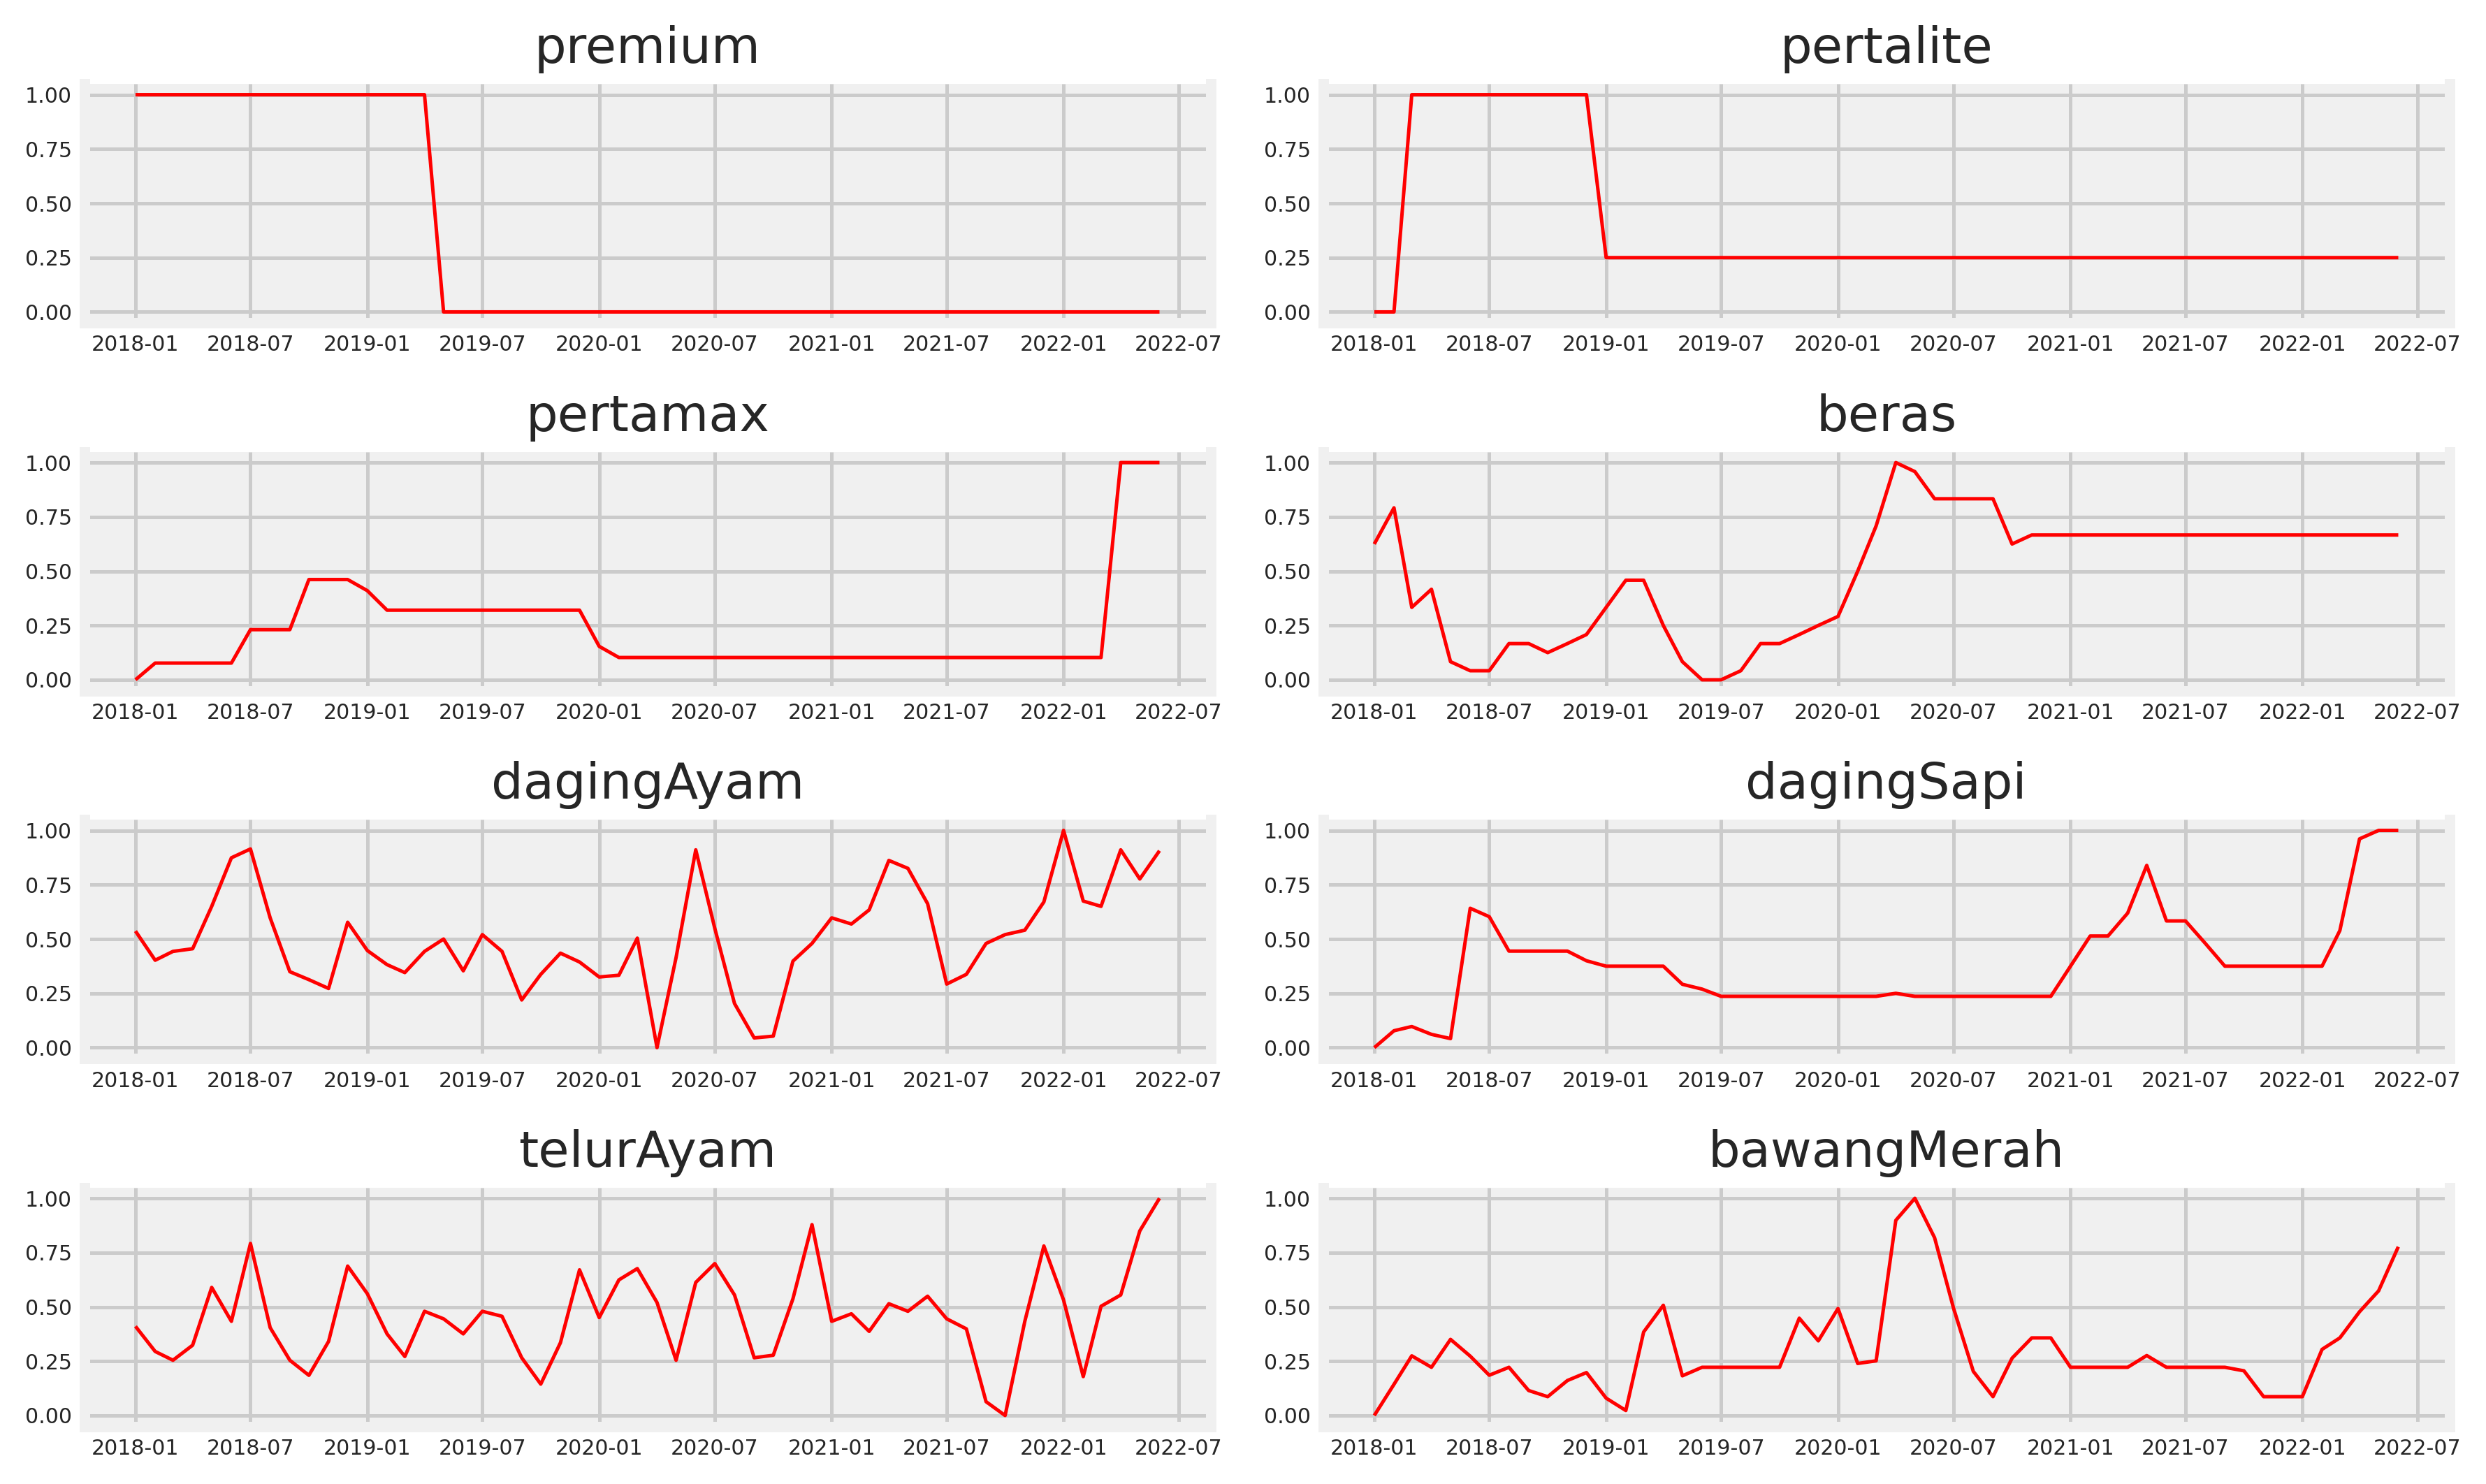

In [13]:
fig, axes = plt.subplots(nrows=4, ncols=2, dpi=360, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

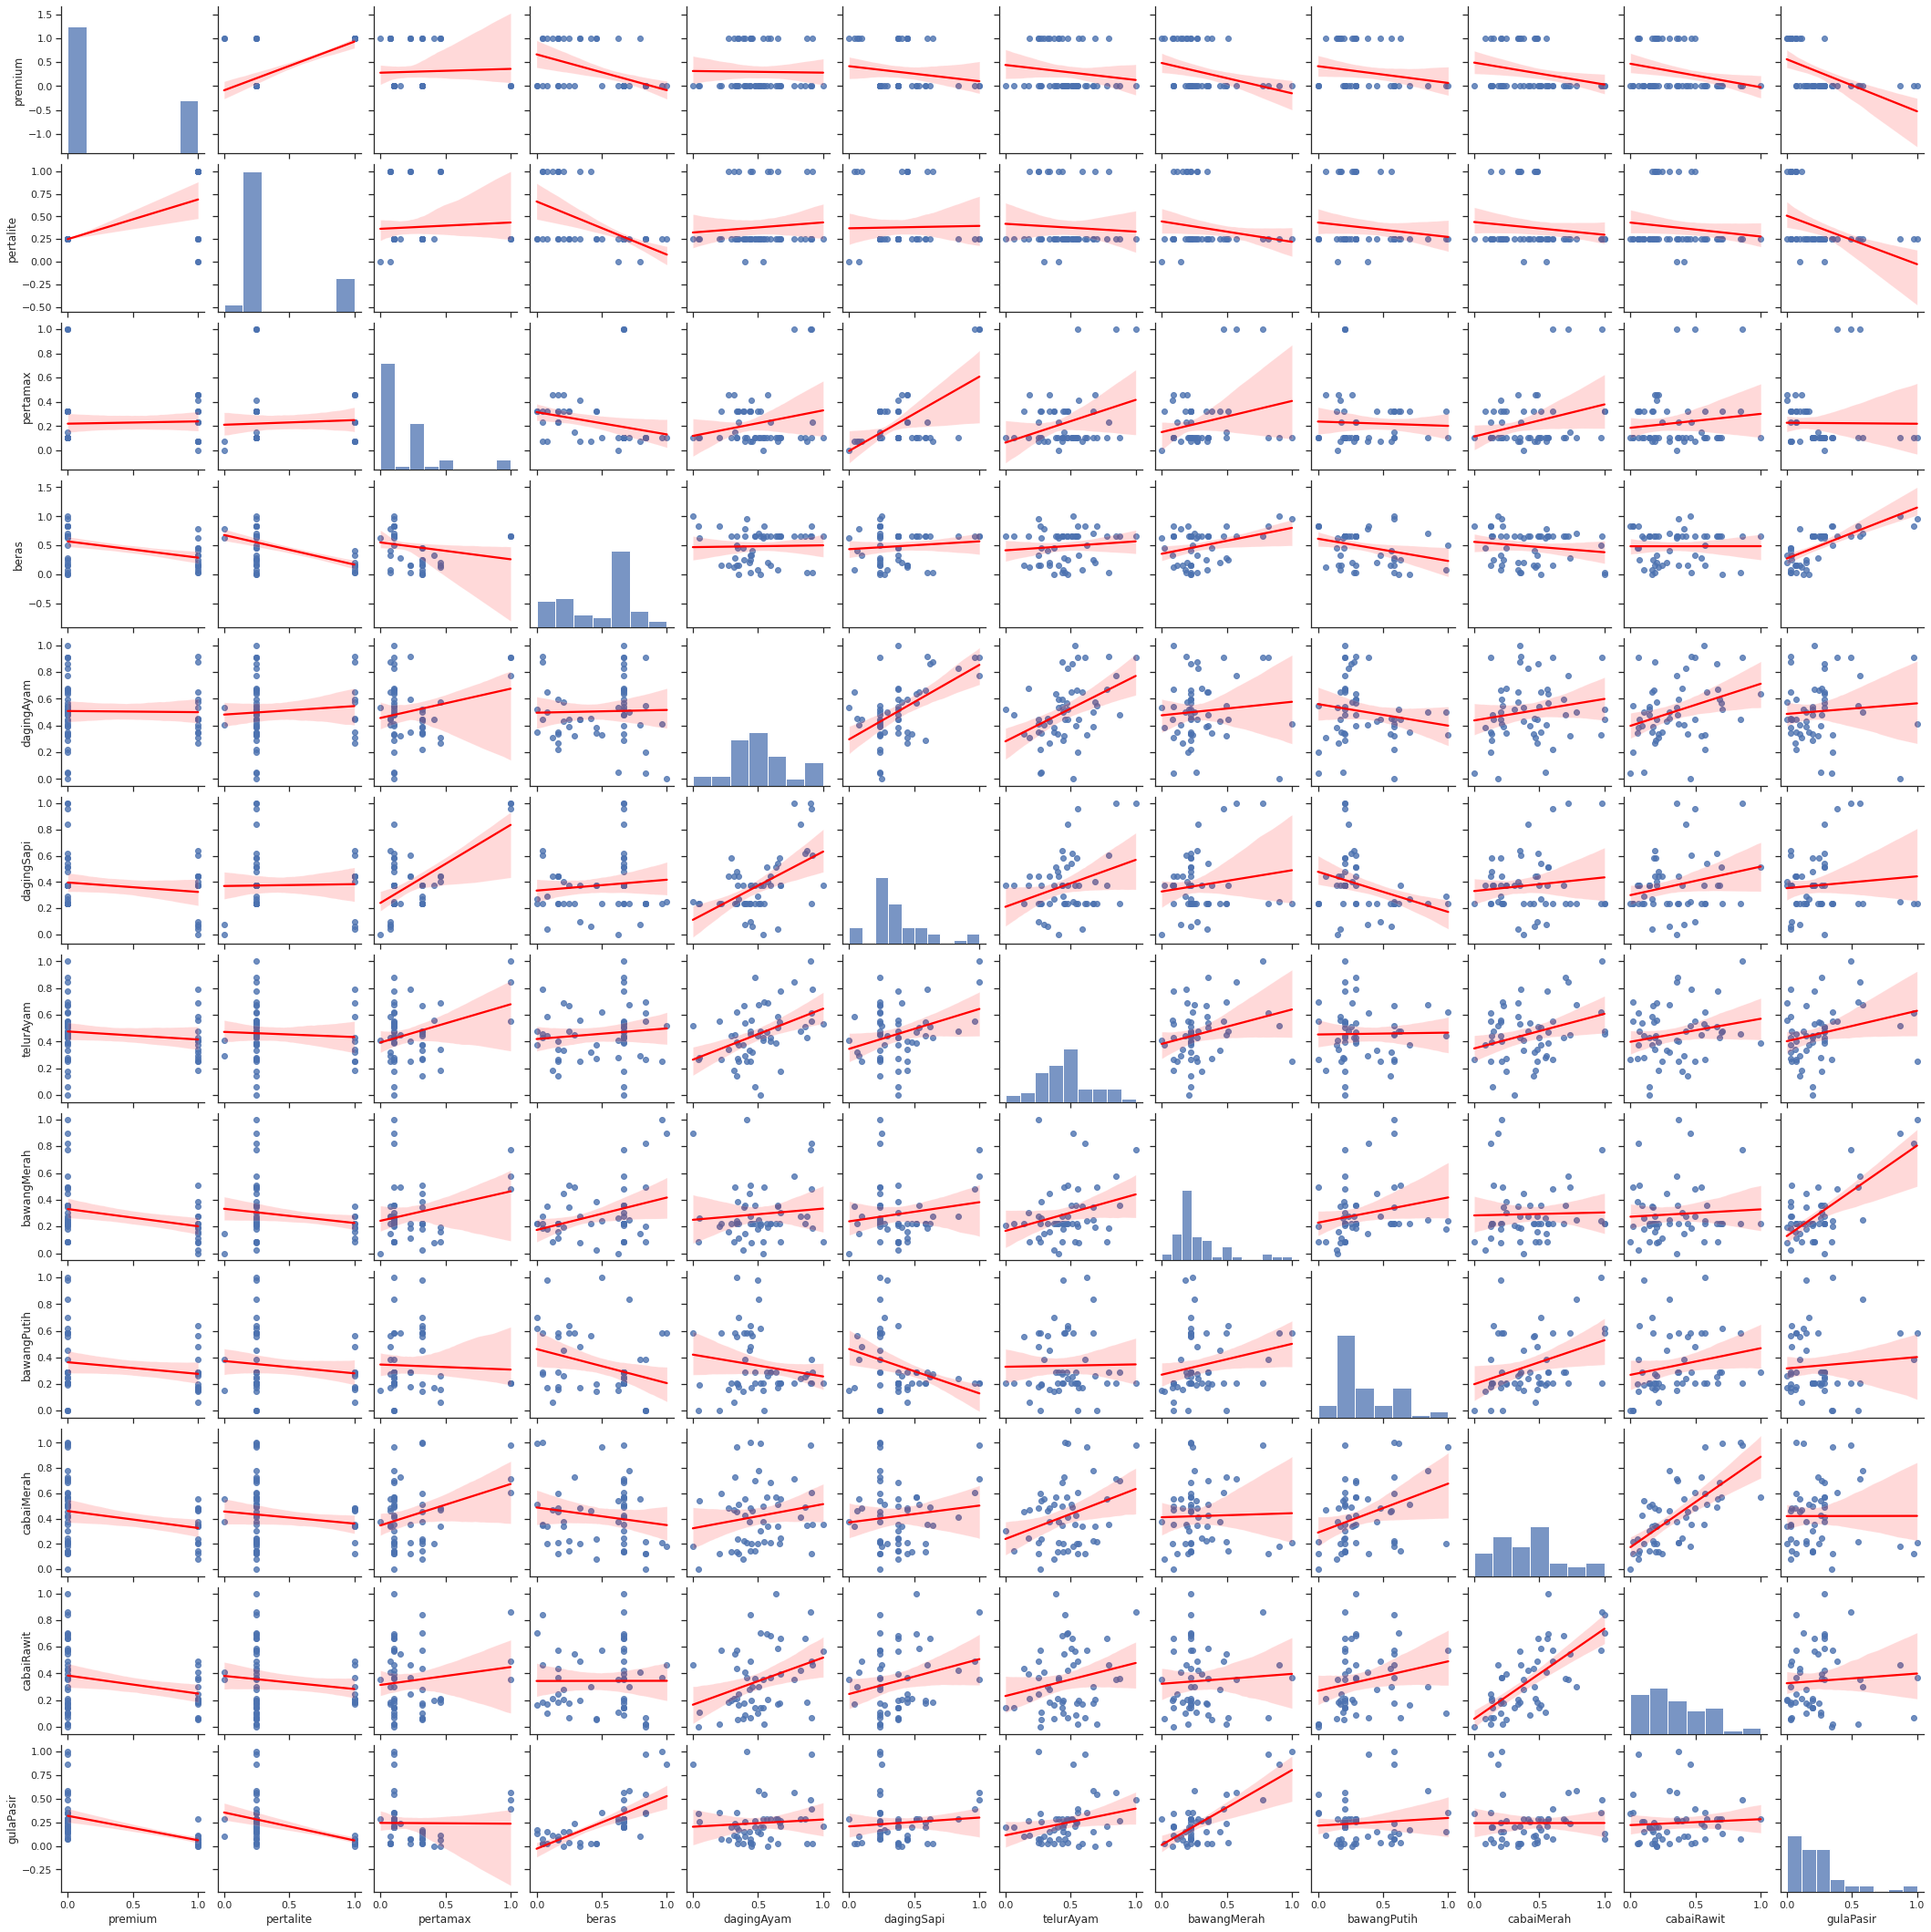

In [14]:
sns.set(style="ticks", color_codes=True)

sns.pairplot(df, kind="reg", plot_kws={'line_kws':{'color':'red'}})
plt.show()

# Diferensiasi


In [15]:
# ADF test
for col in df.columns:
  column_data = df[col]
  adf_result = adfuller(column_data)

  print(f'{col}: ADF Statistic = {adf_result[0]}, p-value = {adf_result[1]}')

premium: ADF Statistic = -1.5406443151033842, p-value = 0.5133180129782506
pertalite: ADF Statistic = -5.2459551865236955, p-value = 7.078692846153438e-06
pertamax: ADF Statistic = -0.9295704714373159, p-value = 0.778078551932386
beras: ADF Statistic = -1.7795749822088163, p-value = 0.3906482534807002
dagingAyam: ADF Statistic = -3.395400246776793, p-value = 0.011116679889212616
dagingSapi: ADF Statistic = -1.692395775630632, p-value = 0.4350345994707664
telurAyam: ADF Statistic = -5.484394377599875, p-value = 2.2468835802866806e-06
bawangMerah: ADF Statistic = -3.4699302911425596, p-value = 0.008793776326572827
bawangPutih: ADF Statistic = -2.8539546858131772, p-value = 0.05097043094480481
cabaiMerah: ADF Statistic = -3.9430095697438468, p-value = 0.0017401594220878766
cabaiRawit: ADF Statistic = -3.6534026059156517, p-value = 0.004818430989367098
gulaPasir: ADF Statistic = -3.123366782595139, p-value = 0.024871578332423414


In [16]:
# Diferensiasi
# data yang sudah pakai min max scaler tidak perlu di normalisasi karena sudah memiliki skala yang kecil
df = df.diff().dropna()  # Detrending
df = df.diff(12).dropna()  # De-seasonalizing
# df = (df - df.mean()) / df.std()  # Normalisasi
df.head()

,premium,pertalite,pertamax,beras,dagingAyam,dagingSapi,telurAyam,bawangMerah,bawangPutih,cabaiMerah,cabaiRawit,gulaPasir
datetime,,,,,,,,,,,,
2019-02-01,0.0,0.0,-0.166667,-0.041667,0.069106,-0.077778,-0.069364,-0.200271,-0.260174,-0.301633,-0.188040,0.212963
2019-03-01,0.0,-1.0,0.000000,0.458333,-0.077236,-0.019444,-0.063584,0.230041,-0.039244,0.228626,-0.095821,0.064815
2019-04-01,0.0,0.0,0.000000,-0.291667,0.085366,0.036111,0.138728,0.175913,0.350291,-0.074928,0.212536,0.018519
2019-05-01,-1.0,0.0,0.000000,0.166667,-0.138211,-0.063889,-0.300578,-0.453315,0.731105,0.187320,0.164986,0.111111
2019-06-01,0.0,0.0,0.000000,-0.041667,-0.369919,-0.622222,0.086705,0.116373,-0.377907,0.293948,0.041787,0.018519


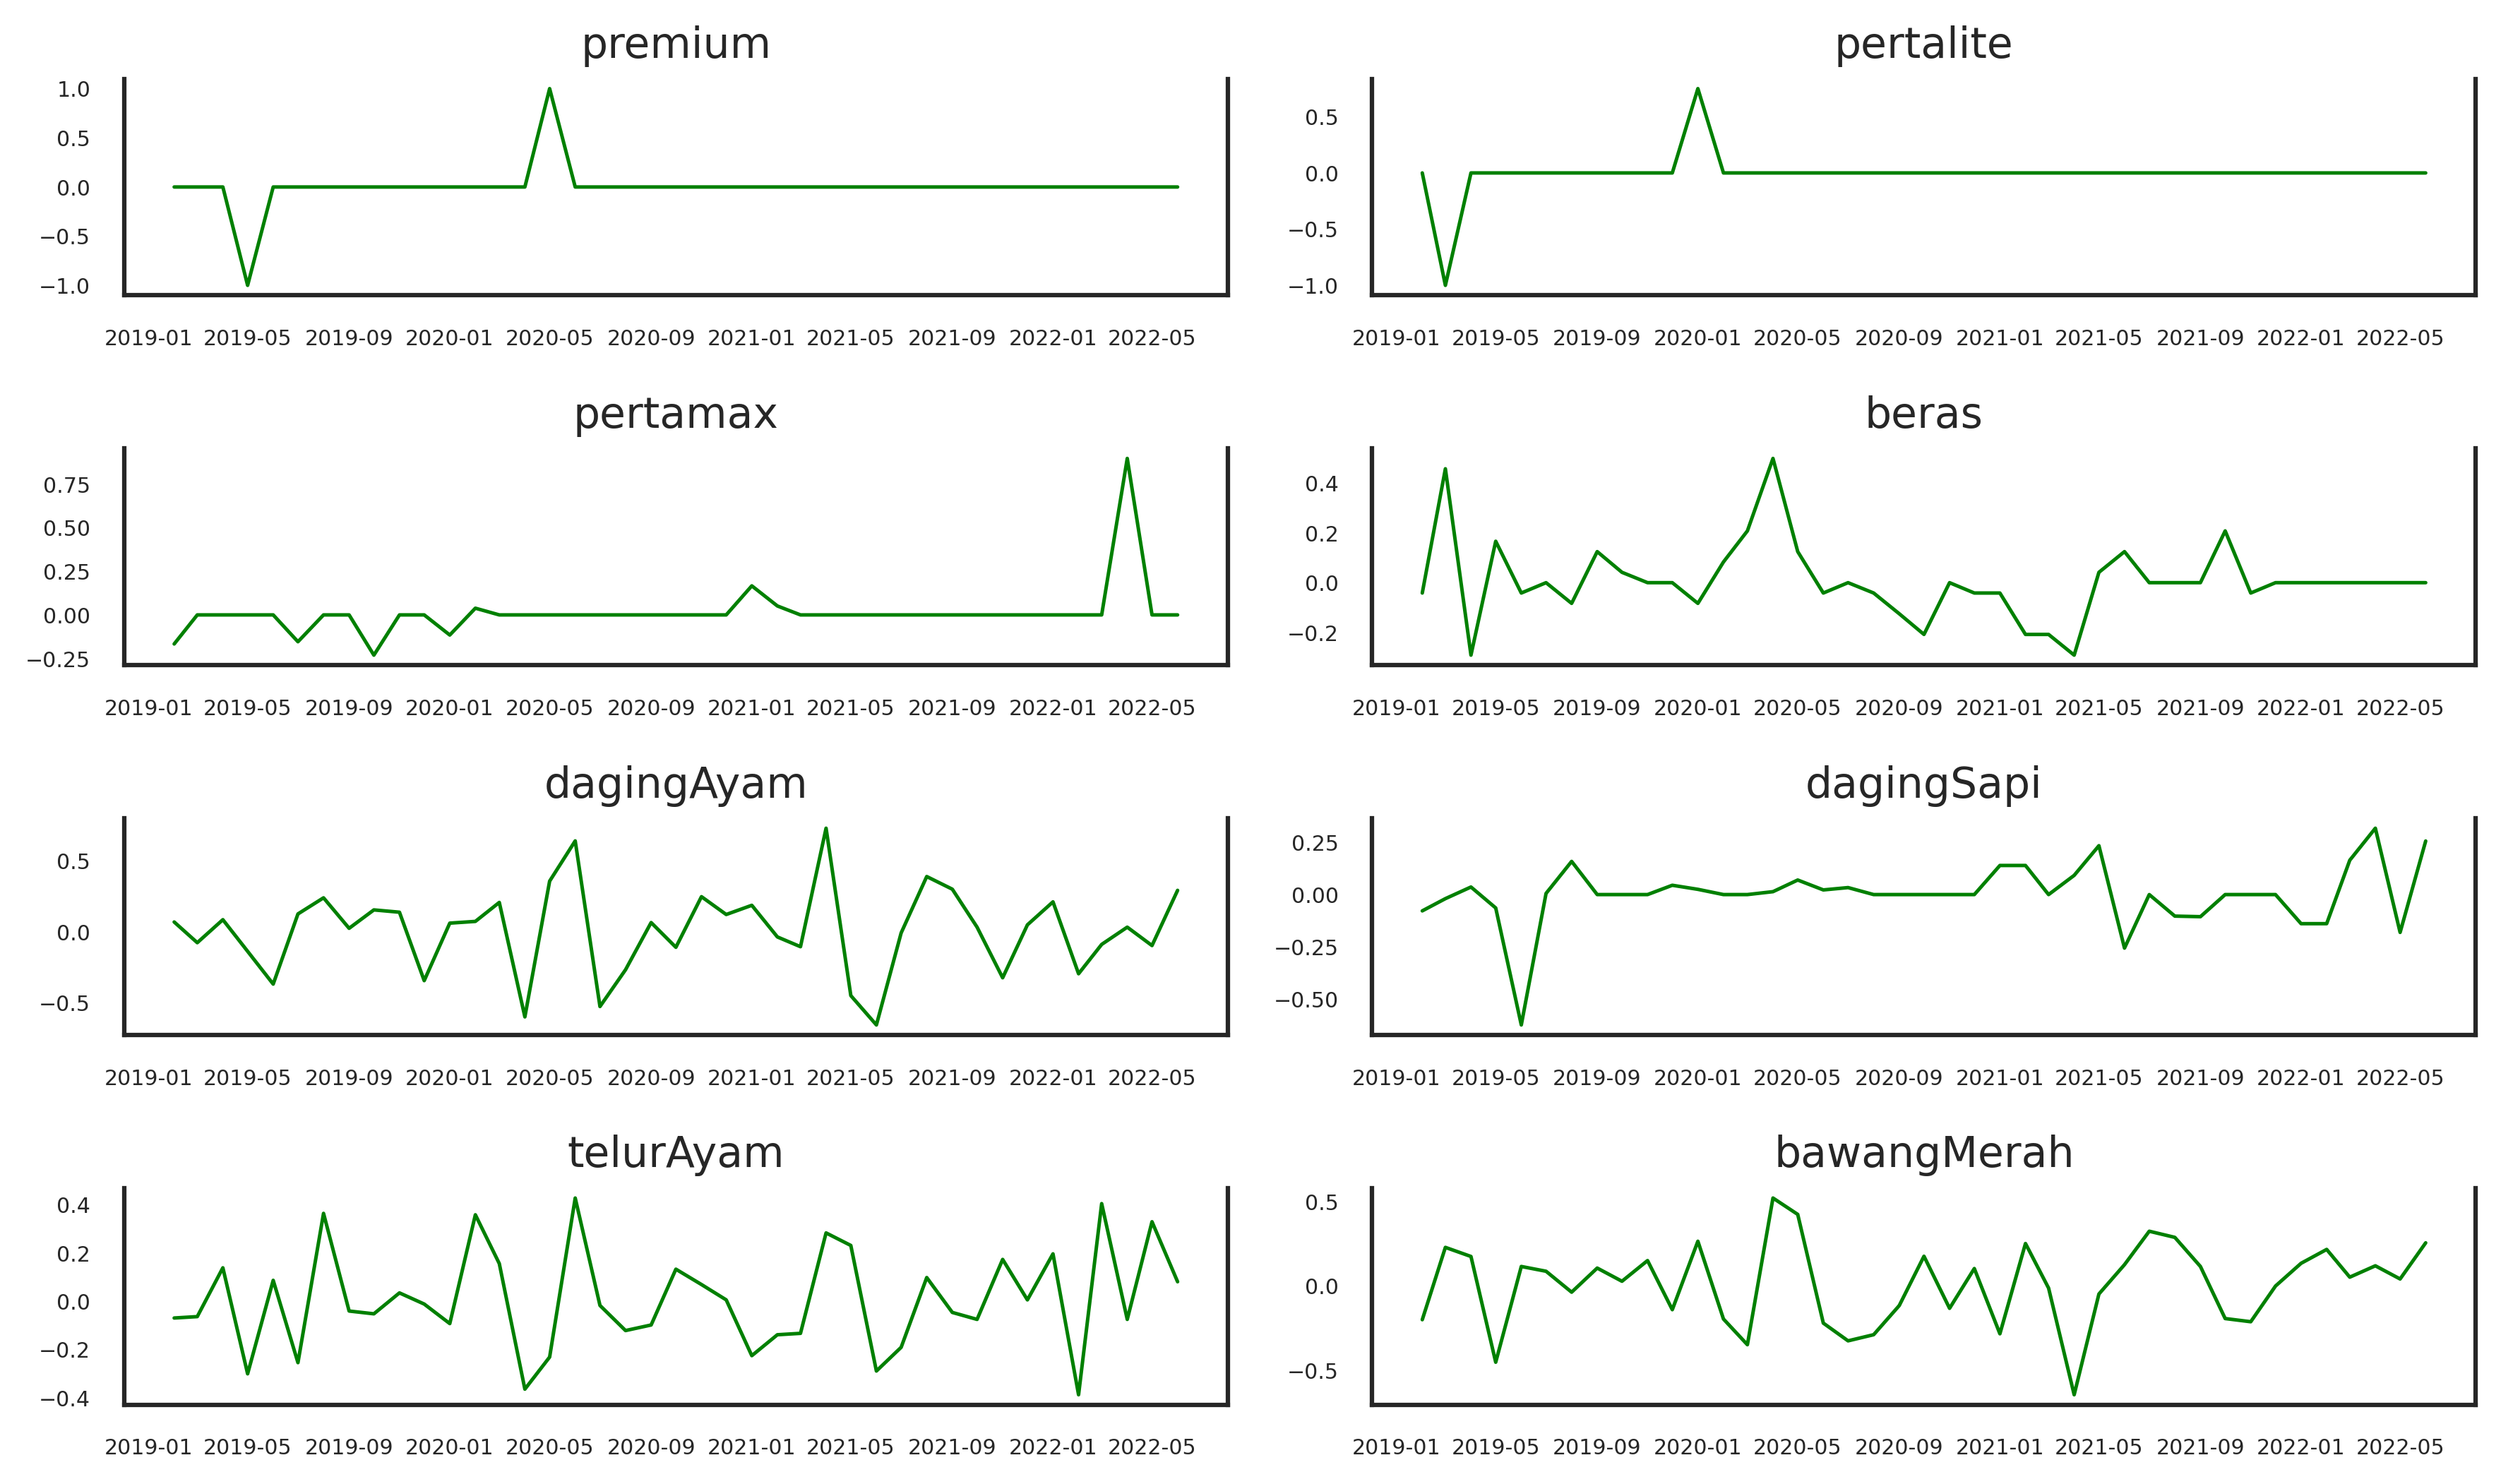

In [17]:
fig, axes = plt.subplots(nrows=4, ncols=2, dpi=360, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='green', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [18]:
# ADF test
for col in df.columns:
  column_data = df[col]
  adf_result = adfuller(column_data)

  print(f'{col}: ADF Statistic = {adf_result[0]}, p-value = {adf_result[1]}')

premium: ADF Statistic = -6.164414002968977, p-value = 7.046515849314692e-08
pertalite: ADF Statistic = -4.082496085327445, p-value = 0.001035098289790979
pertamax: ADF Statistic = -6.298348829657674, p-value = 3.4610812911853624e-08
beras: ADF Statistic = -5.647384326620037, p-value = 1.0040919322270133e-06
dagingAyam: ADF Statistic = -4.651688090359257, p-value = 0.00010361303884530559
dagingSapi: ADF Statistic = -6.114392891326988, p-value = 9.16878184038804e-08
telurAyam: ADF Statistic = -6.095242457898349, p-value = 1.013772600753045e-07
bawangMerah: ADF Statistic = -5.728684188223234, p-value = 6.678250032879259e-07
bawangPutih: ADF Statistic = -5.461069471678348, p-value = 2.5179541744019073e-06
cabaiMerah: ADF Statistic = -4.882881272836696, p-value = 3.765122919090511e-05
cabaiRawit: ADF Statistic = -4.835592530072248, p-value = 4.647129878352719e-05
gulaPasir: ADF Statistic = -3.5580624547591437, p-value = 0.006615294470258945


# PACF

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41 entries, 2019-02-01 to 2022-06-01
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   premium      41 non-null     float64
 1   pertalite    41 non-null     float64
 2   pertamax     41 non-null     float64
 3   beras        41 non-null     float64
 4   dagingAyam   41 non-null     float64
 5   dagingSapi   41 non-null     float64
 6   telurAyam    41 non-null     float64
 7   bawangMerah  41 non-null     float64
 8   bawangPutih  41 non-null     float64
 9   cabaiMerah   41 non-null     float64
 10  cabaiRawit   41 non-null     float64
 11  gulaPasir    41 non-null     float64
dtypes: float64(12)
memory usage: 4.2 KB


<ipython-input-20-7839aa29670b>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  ax.stem(pacf)


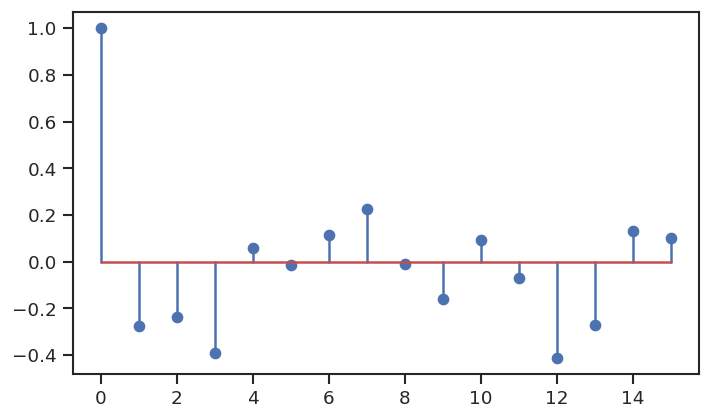

In [20]:
pacf = sm.tsa.pacf(df['telurAyam'], nlags=15)
fig, ax = plt.subplots(dpi=120)
ax.stem(pacf)
plt.show()

<ipython-input-21-65d2c31f117a>:15: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  ax.stem(pacf)
<ipython-input-21-65d2c31f117a>:15: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  ax.stem(pacf)
<ipython-input-21-65d2c31f117a>:15: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_coll

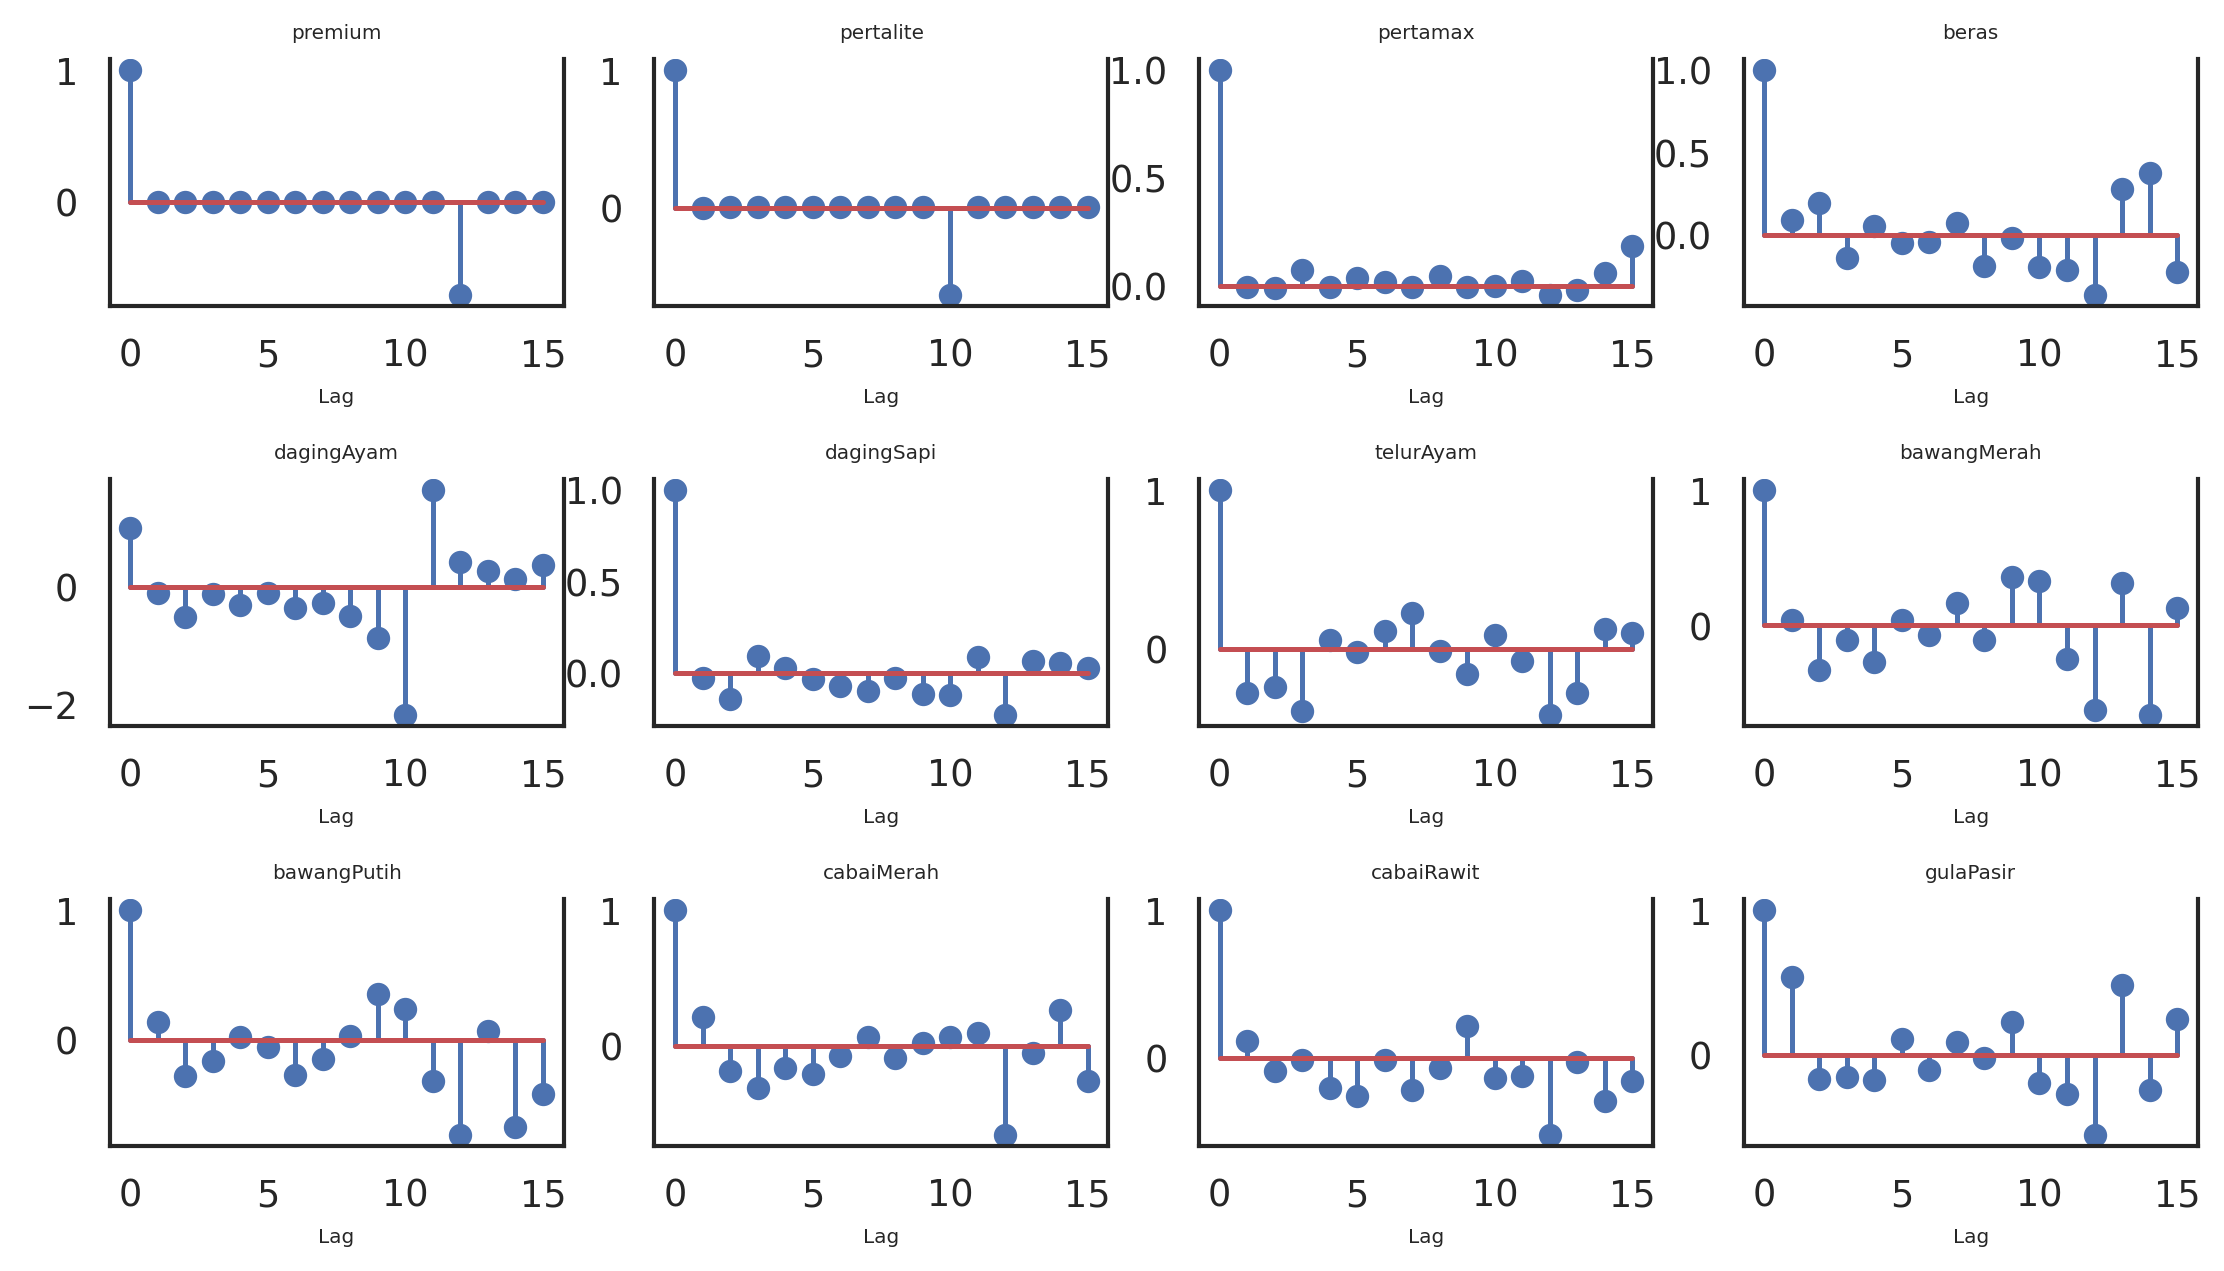

In [21]:
#PACF digunakan untuk mengukur korelasi variabel dengan masa lampaunya

# Create subplots with 2 rows and 3 columns
fig, axes = plt.subplots(nrows=3, ncols=4, dpi=240, figsize=(10,6))

# Loop through each column in the dataframe
for i, ax in enumerate(axes.flatten()):
  # Extract the data for the current column
  column_data = df[df.columns[i]]
  
  # Calculate the PACF for the column data
  pacf = sm.tsa.pacf(column_data, nlags=15)
  
  # Plot the PACF
  ax.stem(pacf)
  
  # Label the x-axis
  ax.set_xlabel('Lag', fontsize=6)

  # Add title with column name
  ax.set_title(df.columns[i], fontsize=6)
  
  # Remove ticks and spines
  ax.xaxis.set_ticks_position('none')
  ax.yaxis.set_ticks_position('none')
  ax.spines["top"].set_alpha(0)
  ax.tick_params

  # Add space betweeen plots
  plt.subplots_adjust(hspace=0.7)

# Show the plot
plt.show()

In [22]:
# cari lag optimum
# 1 merupakan lag optimum

# Anderson Darling

In [24]:
from scipy.stats import anderson

# Menentukan nilai statistik Anderson-Darling
stat, critical, sig_level = anderson(df['beras'])

# Mengecek apakah data dianggap normal atau tidak
if stat < critical[2]:
    print("Data dianggap normal dengan tingkat kepercayaan 95%.")
else:
    print("Data dianggap tidak normal dengan tingkat kepercayaan 95%.")

Data dianggap tidak normal dengan tingkat kepercayaan 95%.


# GARCH

In [25]:
df_garch = df.copy()
df_garch.head()

,premium,pertalite,pertamax,beras,dagingAyam,dagingSapi,telurAyam,bawangMerah,bawangPutih,cabaiMerah,cabaiRawit,gulaPasir
datetime,,,,,,,,,,,,
2019-02-01,0.0,0.0,-0.166667,-0.041667,0.069106,-0.077778,-0.069364,-0.200271,-0.260174,-0.301633,-0.188040,0.212963
2019-03-01,0.0,-1.0,0.000000,0.458333,-0.077236,-0.019444,-0.063584,0.230041,-0.039244,0.228626,-0.095821,0.064815
2019-04-01,0.0,0.0,0.000000,-0.291667,0.085366,0.036111,0.138728,0.175913,0.350291,-0.074928,0.212536,0.018519
2019-05-01,-1.0,0.0,0.000000,0.166667,-0.138211,-0.063889,-0.300578,-0.453315,0.731105,0.187320,0.164986,0.111111
2019-06-01,0.0,0.0,0.000000,-0.041667,-0.369919,-0.622222,0.086705,0.116373,-0.377907,0.293948,0.041787,0.018519


In [26]:
def vecl(matrix):
    lower_matrix = np.tril(matrix,k=-1) 
    array_with_zero = np.matrix(lower_matrix).A1 
    array_without_zero = array_with_zero[array_with_zero!=0]
    return array_without_zero

In [27]:
def garch_t_to_u(df_garch, res):
    mu = res.params['mu'] 
    nu = res.params['nu']
   
    est_r = df_garch - mu
    h = res.conditional_volatility
    
    std_res = est_r / h
    
    udata = t.cdf(std_res, nu)
    # udata = uniform data
    return udata

In [28]:
def loglike_norm_dcc_copula(theta, udata): 
   
    N, T = np.shape(udata)
    
    llf = np.zeros((T,1))
    
    trdata = np.array(norm.ppf(udata).T, ndmin=2)
    
   
    Rt, veclRt =  dcceq(theta,trdata)

   
    for i in range(0,T):
       
        llf[i] = -0.5* np.log(np.linalg.det(Rt[:,:,i]))
        
        llf[i] = llf[i] - 0.5 *  np.matmul(np.matmul(trdata[i,:] , (np.linalg.inv(Rt[:,:,i]) - np.eye(N))) ,trdata[i,:].T)

    
    llf = np.sum(llf)

    return -llf

In [29]:
def dcceq(theta,trdata):
    T, N = np.shape(trdata)

    a, b = theta
    
    if min(a,b)<0 or max(a,b)>1 or a+b > .999999:
        a = .9999 - b
        
    Qt = np.zeros((N, N ,T))

    Qt[:,:,0] = np.cov(trdata.T)

    Rt =  np.zeros((N, N ,T))
   
    veclRt =  np.zeros((T, int(N*(N-1)/2)))

    Rt[:,:,0] = np.corrcoef(trdata.T)
    
    # 
    for j in range(1,T):
        Qt[:,:,j] = Qt[:,:,0] * (1-a-b)
        Qt[:,:,j] = Qt[:,:,j] + a * np.matmul(trdata[[j-1]].T, trdata[[j-1]])
        Qt[:,:,j] = Qt[:,:,j] + b * Qt[:,:,j-1]
        Rt[:,:,j] = np.divide(Qt[:,:,j] , np.matmul(np.sqrt(np.array(np.diag(Qt[:,:,j]), ndmin=2)).T , np.sqrt(np.array(np.diag(Qt[:,:,j]), ndmin=2))))
    
    for j in range(0,T):
        veclRt[j, :] = vecl(Rt[:,:,j].T)
    return Rt, veclRt

In [30]:
model_parameters = {}
udata_list = []

def run_garch(df_garch, udata_list, model_parameters):
    for x in df_garch:
        # membuat model arch dengan distribusi t
        am = arch_model(df_garch[x], dist = 't')
        # mengambil nama kolom
        short_name = x.split()[0]
        # fitting model
        model_parameters[short_name] = am.fit(disp='off')
        # udata = memanggil function di atas untuk membuat hasil menjadi uniform distrubusi
        udata = garch_t_to_u(df_garch[x], model_parameters[short_name])
        # memasukan hasil udata ke dalam list 
        udata_list.append(udata)
    return udata_list, model_parameters

In [31]:
# am 

In [32]:
udata_list, model_parameters = run_garch(df_garch.dropna(), udata_list, model_parameters)
# menjalankan function run_garch
# hasil nya adalah udata_list yang berisi udata dari setiap kolom
# model_parameter yang berisi summary dari fit model

/usr/local/lib/python3.8/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.04878. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.8/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.03807. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.8/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is

In [33]:
print(model_parameters)

{'premium':                         Constant Mean - GARCH Model Results                         
Dep. Variable:                      premium   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:                152.781
Distribution:      Standardized Student's t   AIC:                          -295.561
Method:                  Maximum Likelihood   BIC:                          -286.994
                                              No. Observations:                   41
Date:                      Mon, Jan 23 2023   Df Residuals:                       40
Time:                              14:31:50   Df Model:                            1
                                   Mean Model                                  
                  coef    std err          t      P>|t|        95.0% Conf. Int.
---------------------------------------------------------------

In [34]:
print(udata_list)

[array([5.00219825e-01, 5.00663941e-01, 5.01845758e-01, 6.84874322e-07,
       5.00754892e-01, 5.02047794e-01, 5.03628975e-01, 5.04134076e-01,
       5.04201666e-01, 5.04209109e-01, 5.04209909e-01, 5.04209995e-01,
       5.04210004e-01, 5.04210005e-01, 5.04210006e-01, 9.99999588e-01,
       5.00755396e-01, 5.02048874e-01, 5.03629619e-01, 5.04134178e-01,
       5.04201678e-01, 5.04209111e-01, 5.04209910e-01, 5.04209995e-01,
       5.04210004e-01, 5.04210005e-01, 5.04210006e-01, 5.04210006e-01,
       5.04210006e-01, 5.04210006e-01, 5.04210006e-01, 5.04210006e-01,
       5.04210006e-01, 5.04210006e-01, 5.04210006e-01, 5.04210006e-01,
       5.04210006e-01, 5.04210006e-01, 5.04210006e-01, 5.04210006e-01,
       5.04210006e-01]), array([0.50203571, 0.0043331 , 0.50117103, 0.50229037, 0.50238861,
       0.5023916 , 0.50239169, 0.50239169, 0.50239169, 0.50239169,
       0.50239169, 0.99180897, 0.50143177, 0.50233288, 0.50238995,
       0.50239164, 0.50239169, 0.50239169, 0.50239169, 0.502391

# DCC

In [35]:
cons = ({'type': 'ineq', 'fun': lambda x:  -x[0]  -x[1] +1})
bnds = ((0, 0.5), (0, 0.9997))

In [36]:
%time opt_out = minimize(loglike_norm_dcc_copula, [0.01, 0.95], args = (udata_list,), bounds=bnds, constraints=cons)

CPU times: user 95.3 ms, sys: 69.5 ms, total: 165 ms
Wall time: 87.7 ms


In [37]:
print(opt_out.success)
print(opt_out.x)

True
[5.35521965e-11 1.09355826e-06]


In [38]:
llf  = loglike_norm_dcc_copula(opt_out.x, udata_list)
llf

-53.393171061097064

In [39]:
# mengubah menjadi udata_list menjadi array 2 dimensi
trdata = np.array(norm.ppf(udata_list).T, ndmin=2)
Rt, veclRt = dcceq(opt_out.x, trdata)

In [40]:
# mengambil nama kolom
stock_names = [x.split()[0] for x in df_garch.columns]

In [41]:
stock_names

['premium',
 'pertalite',
 'pertamax',
 'beras',
 'dagingAyam',
 'dagingSapi',
 'telurAyam',
 'bawangMerah',
 'bawangPutih',
 'cabaiMerah',
 'cabaiRawit',
 'gulaPasir']

In [42]:
# list korelasi
corr_name_list = []
for i, name_a in enumerate(stock_names):
    if i == 0:
        pass
    else:
        for name_b in stock_names[:i]:
            corr_name_list.append(name_a + "-" + name_b)

In [43]:
dcc_corr = pd.DataFrame(veclRt, index = df_garch.dropna().index, columns= corr_name_list)
# dcc_corr
dcc_plot = px.line(dcc_corr, title = 'Dynamic Conditional Correlation plot', width=1000, height=500)
dcc_plot.show()

In [44]:
dcc_corr['gulaPasir-pertalite'].mean()

0.03725228836380195

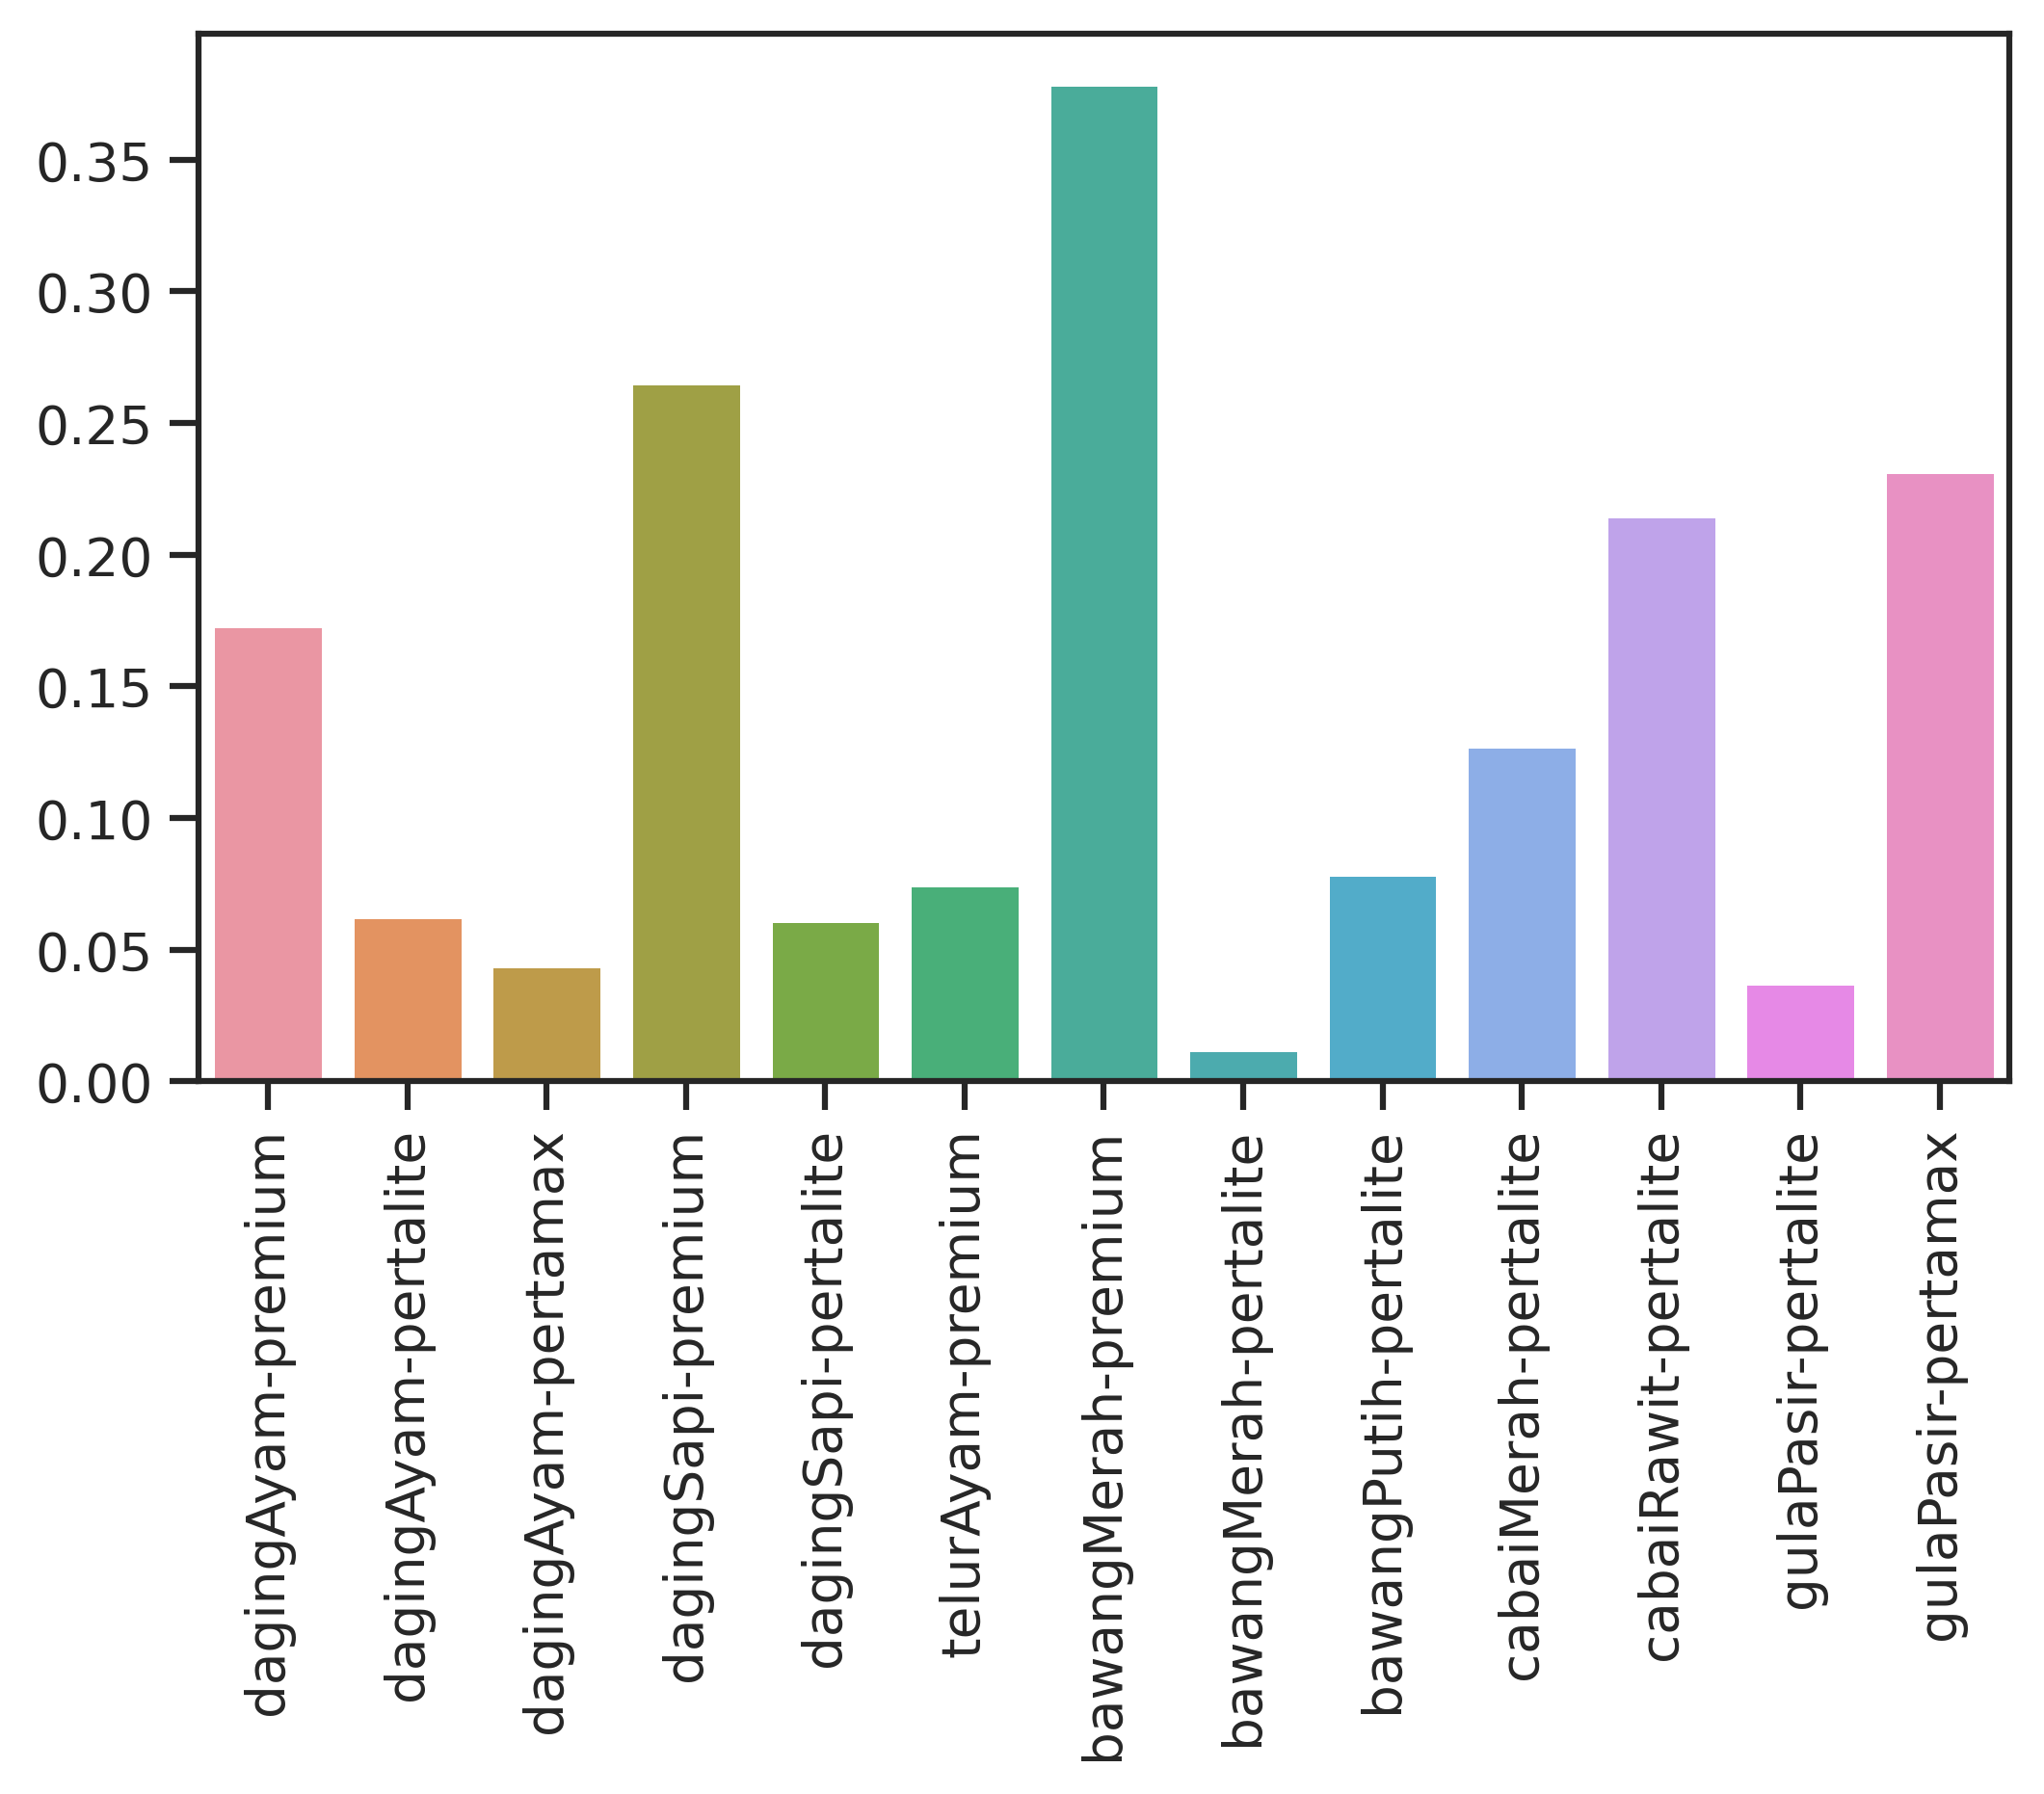

In [45]:
kolom_positif = ['dagingAyam-premium','dagingAyam-pertalite','dagingAyam-pertamax','dagingSapi-premium','dagingSapi-pertalite','telurAyam-premium','bawangMerah-premium','bawangMerah-pertalite','bawangPutih-pertalite','cabaiMerah-pertalite','cabaiRawit-pertalite','gulaPasir-pertalite','gulaPasir-pertamax']
var_positif = dcc_corr[kolom_positif]
max_values = [var_positif[col].max() for col in var_positif]

# membuat barplot
sns.barplot(x=var_positif.keys(), y=max_values)
plt.xticks(rotation=90)
plt.gcf().set_dpi(360)
plt.show()
# max_values = [max(var_positif[col] for col in var_positif)]
# plt.bar(dcc_corr.keys(), max_values)
# plt.show()

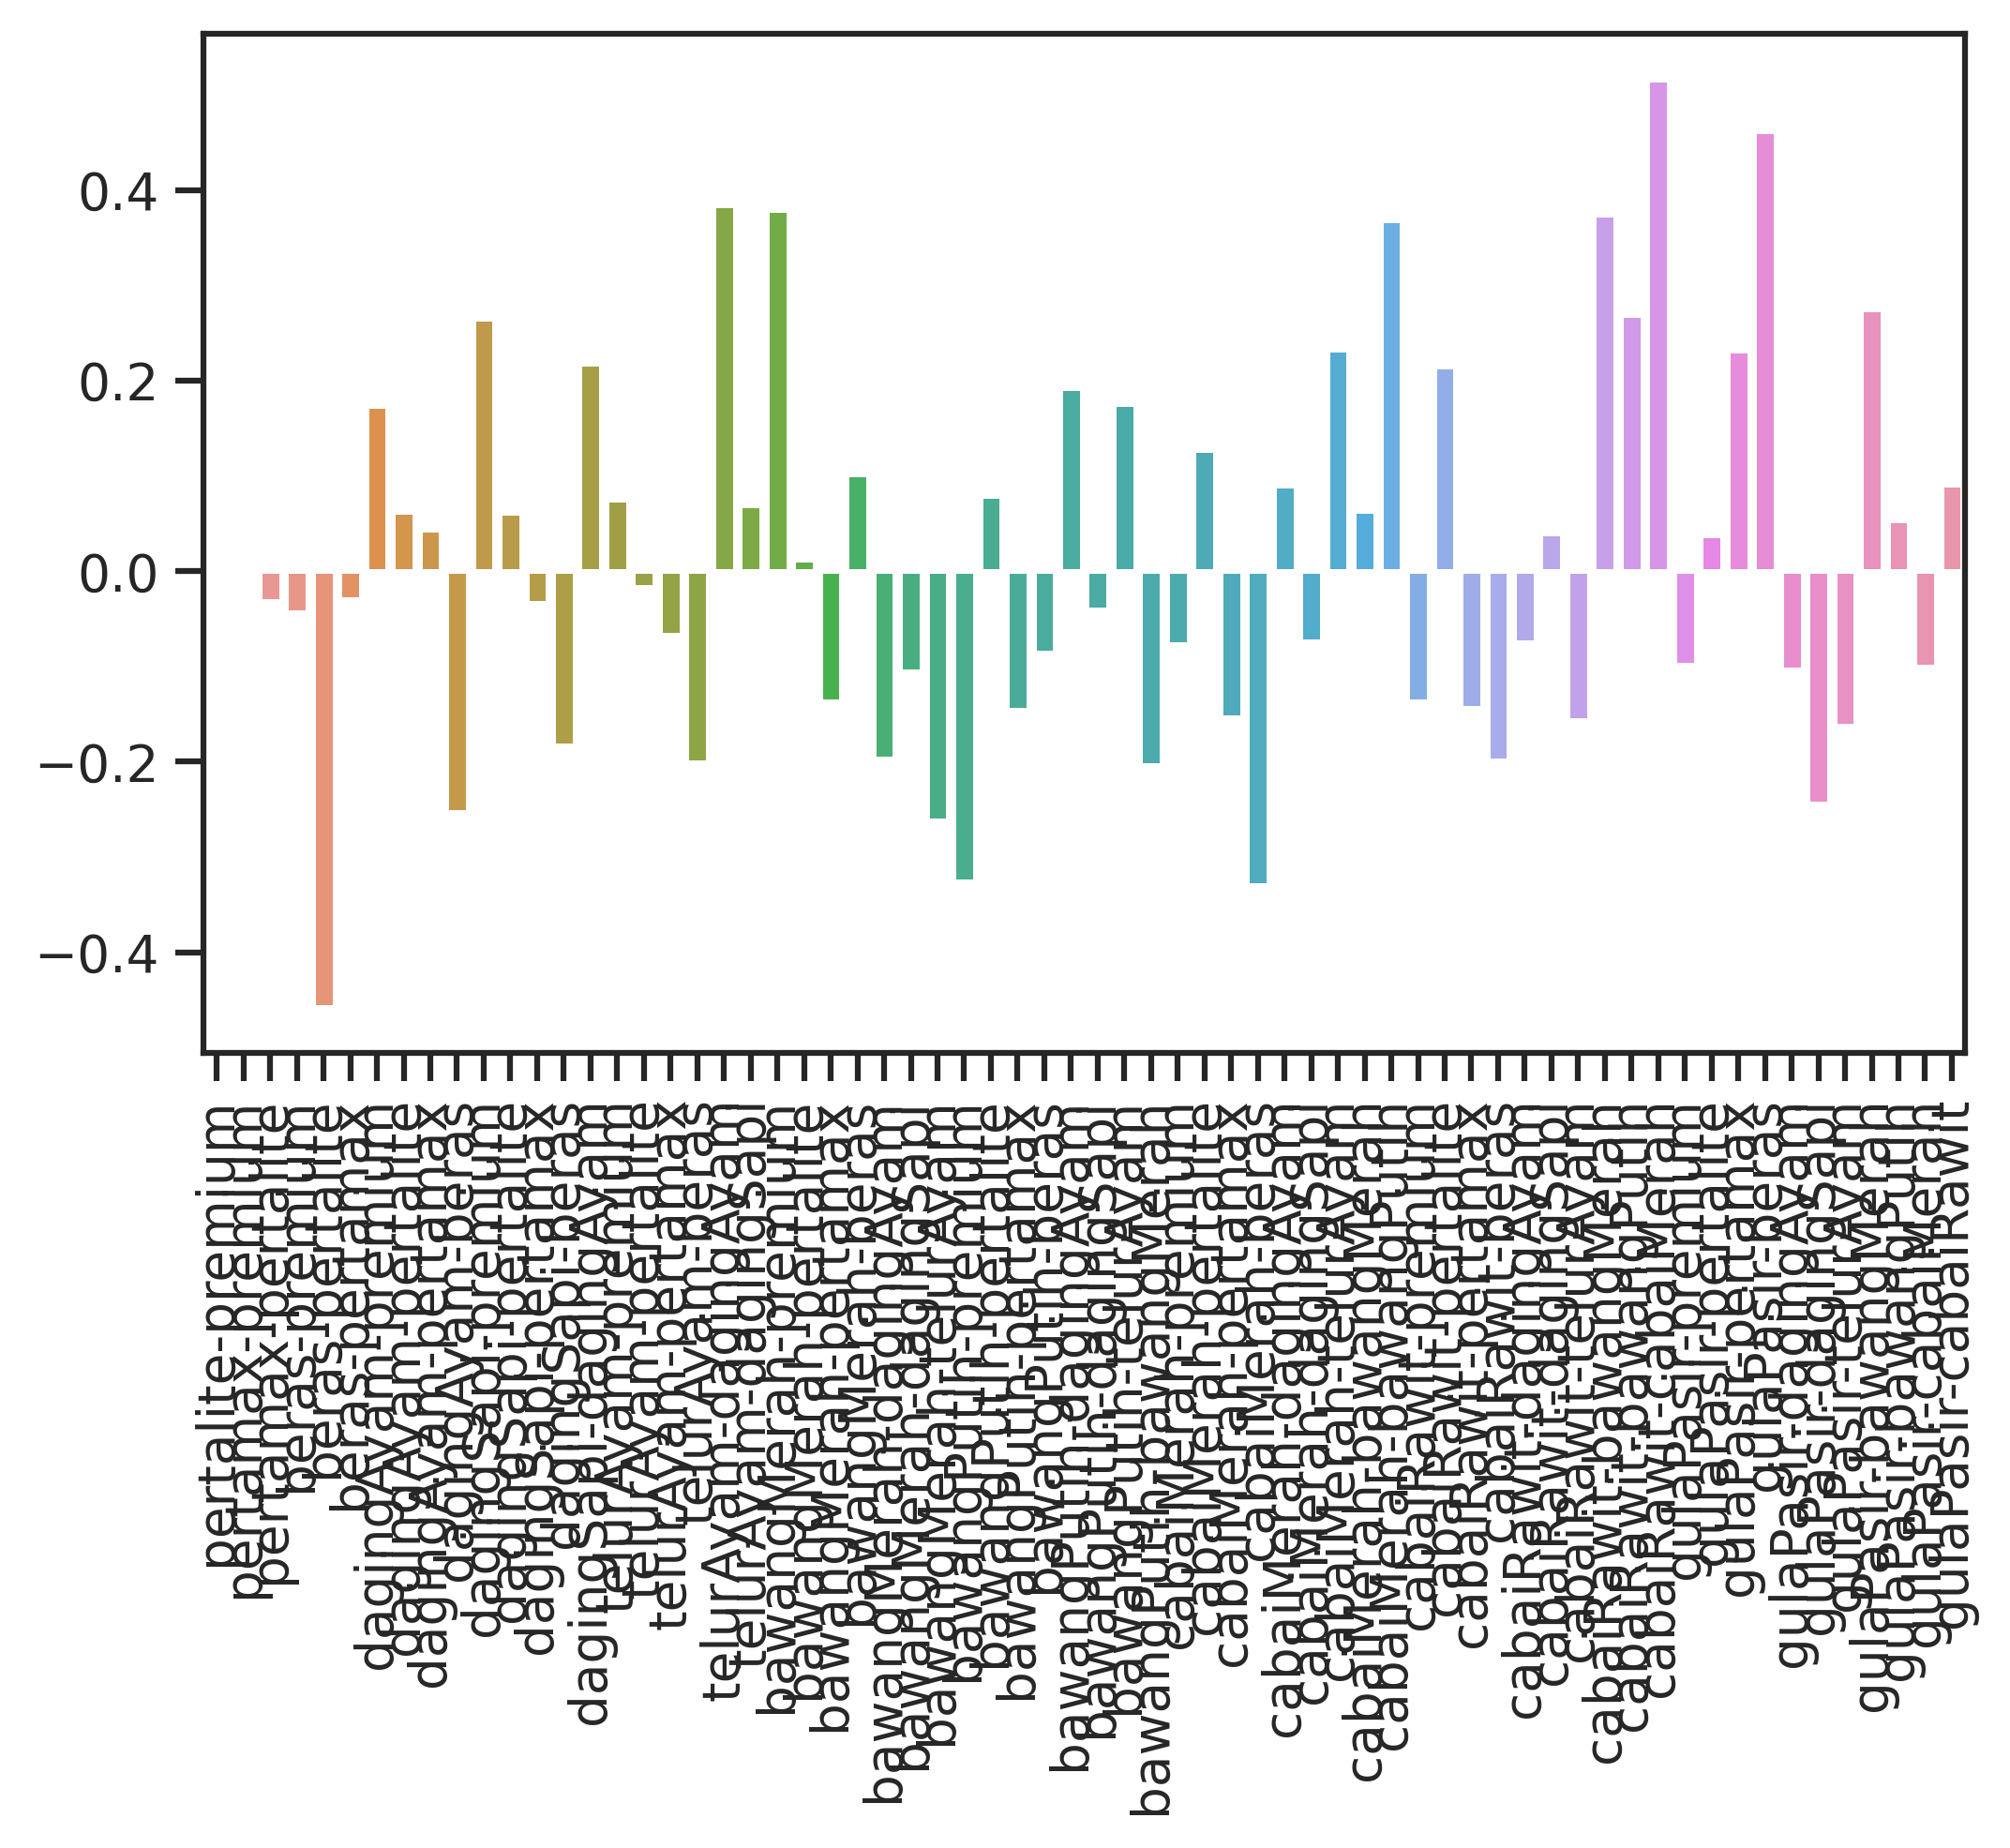

In [46]:
# var_positif = dcc_corr[kolom_positif]
max_values = [dcc_corr[col].max() for col in dcc_corr]

# membuat barplot
sns.barplot(x=dcc_corr.keys(), y=max_values)
plt.xticks(rotation=90)
plt.gcf().set_dpi(360)
plt.show()

In [47]:
print(max_values)

[0.001009380523631106, -0.0015551379990134606, -0.03135904209433764, -0.04262573842437923, -0.4571541664172905, -0.029465002016172633, 0.17299776264816585, 0.06261081196187472, 0.04385216386006708, -0.25298570853660973, 0.26546605350819735, 0.06124931318376911, -0.033296766132362814, -0.18291891477754263, 0.2175229881395608, 0.07471048829799981, -0.01608379464555899, -0.0669742391085416, -0.20093301685510084, 0.3838784504292472, 0.06956499624986137, 0.37880821397569614, 0.012012935961283968, -0.13638600613067042, 0.10193424864069438, -0.19703087188061716, -0.10550496734645318, -0.2618931510572191, -0.3260257627326645, 0.07877727870081083, -0.1457106200308022, -0.08566599360480426, 0.19170383033664962, -0.04034658610817525, 0.17532699959144357, -0.20319977293727984, -0.0763246934526181, 0.1272554090956783, -0.1536506444548908, -0.32914135249264187, 0.08983925164848752, -0.07365483299811619, 0.23285584536444812, 0.06282733624070722, 0.3684433259954805, -0.13695962012952434, 0.21474607359

In [48]:
# max_values = [max(filter(lambda x: x > 0, dcc_corr[col])) for col in dcc_corr]
# # membuat barplot
# plt.bar(dcc_corr.keys(), max_values)
# plt.show()

In [49]:
# Menggabungkan volatilitas kondisional dari setiap model GARCH yang dibentuk dalam model_parameters menjadi satu dataframe
garch_vol_df = pd.concat([pd.DataFrame(model_parameters[x].conditional_volatility/100)*1600 for x in model_parameters], axis=1)
# Mengganti nama kolom dari dataframe dengan nama saham yang ada di stock_names
garch_vol_df.columns = stock_names

In [50]:
# import plotly.io as pio
px.line(garch_vol_df, title='GARCH Conditional Volatility', width=1000, height=500)


	# 3266×2449 
# fig = px.line(garch_vol_df, title='GARCH Conditional Volatility')
# pio.write_image(fig, 'garch_volatility.png', width=1000, height=500, scale=2)

# fig = plt.Figure(figsize=(10, 5))
# plt.plot(garch_vol_df)
# plt.title('GARCH Conditional Volatility')
# plt.rcParams["figure.dpi"] = 360
# plt.show()

# sns.lineplot(data=garch_vol_df)
# plt.title('GARCH Conditional Volatility')
# plt.show()

In [51]:
garch_vol_df.head()

,premium,pertalite,pertamax,beras,dagingAyam,dagingSapi,telurAyam,bawangMerah,bawangPutih,cabaiMerah,cabaiRawit,gulaPasir
datetime,,,,,,,,,,,,
2019-02-01,1.487120,2.259630,1.727658,3.332224,4.587277,2.677410,3.299139,3.905195,4.659272,5.180599,3.755549,2.618829
2019-03-01,0.492372,1.933699,24.680091,1.700976,4.058809,1.752264,3.015309,3.857248,4.565389,5.169559,3.788755,3.090099
2019-04-01,0.177111,3.928154,27.347734,7.590052,3.975724,1.040101,2.928162,3.843268,3.591902,5.164791,3.821673,2.178754
2019-05-01,0.093516,2.008381,27.347994,4.851343,3.919704,0.915758,3.029509,3.771699,4.372754,5.162732,3.854309,2.117644
2019-06-01,0.433050,1.925776,27.347994,3.183696,4.080677,1.375723,3.717108,4.312082,7.960824,5.161844,3.886671,2.366230


In [52]:
#RMSE
def calculate_rmse(df1, df2):
    # Menghitung MSE
    mse = np.mean((df1 - df2)**2)
    # Menghitung RMSE
    rmse = np.sqrt(mse)
    return rmse

# Dataframe pertama
df1 = df_garch
# Dataframe kedua
df2 = garch_vol_df

rmse = calculate_rmse(df1, df2)
print("RMSE:", rmse)

RMSE: premium         0.354593
pertalite       2.063308
pertamax       27.299581
beras           2.981808
dagingAyam      4.845333
dagingSapi      2.443459
telurAyam       3.378691
bawangMerah     3.897246
bawangPutih     4.138053
cabaiMerah      5.148992
cabaiRawit      4.358085
gulaPasir       2.692249
dtype: float64


In [53]:
#MAE
def calculate_mae(df1, df2):
    # Menghitung MAE
    mae = np.mean(np.abs(df1 - df2))
    return mae

# Dataframe pertama
df1 = df_garch
# Dataframe kedua
df2 = garch_vol_df

mae = calculate_mae(df1, df2)
print("MAE:", mae)

MAE: premium         0.191957
pertalite       2.021557
pertamax       26.901324
beras           2.551232
dagingAyam      4.721576
dagingSapi      1.841075
telurAyam       3.345194
bawangMerah     3.880681
bawangPutih     3.697364
cabaiMerah      5.138880
cabaiRawit      4.338089
gulaPasir       2.585561
dtype: float64


In [54]:

def calculate_mape(df1, df2):
    # Menghitung MAPE
    mape = np.mean(np.abs((df1 - df2) / df1)) * 100
    return mape

# Dataframe pertama
df1 = df_garch
# Dataframe kedua
df2 = garch_vol_df

mape = calculate_mape(df1, df2)
print("MAPE:", mape)

MAPE: premium                inf
pertalite              inf
pertamax               inf
beras                  inf
dagingAyam     6290.406473
dagingSapi             inf
telurAyam      6459.081219
bawangMerah            inf
bawangPutih            inf
cabaiMerah     5970.169755
cabaiRawit     5185.737453
gulaPasir              inf
dtype: float64
